## **🩺 Lung Cancer Prediction – My Journey from Data to Diagnosis**

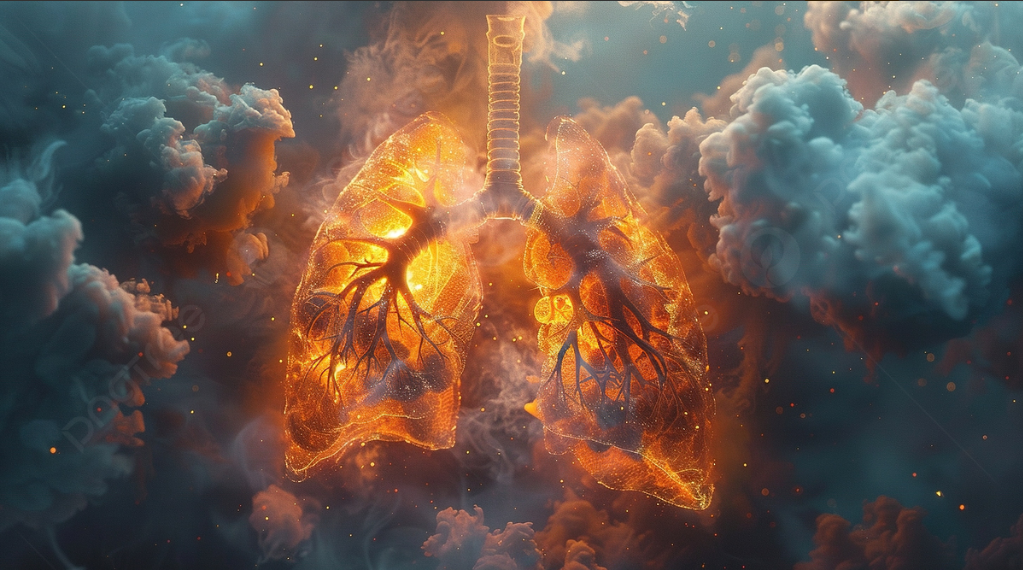

When I began this project, I had one mission in mind:

*Can we empower early detection of lung cancer using data science?*

I started with a dataset containing health-related information like **age**, **smoking history**, **anxiety levels**, **fatigue**, and more — 15 features that might silently hint at the presence of lung cancer.
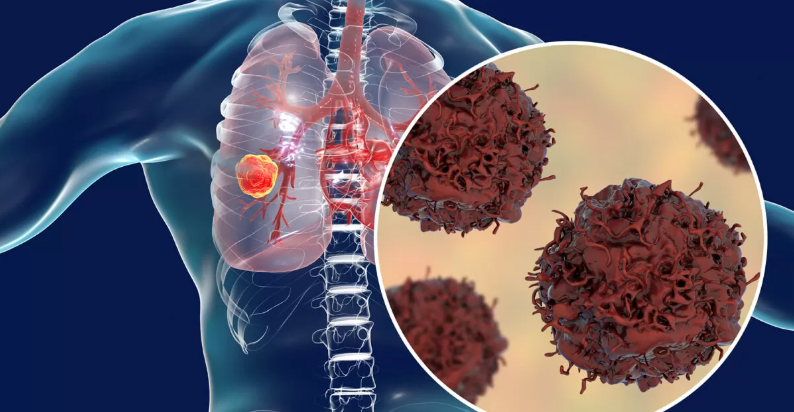

#### ***🧼 Step 1: From Raw to Refined – Cleaning the Dataset***
First, I dived into **data preprocessing**. Some columns had inconsistent labels (like "YES" vs "Yes"), and I standardized all categorical values for clarity. I also checked for null values, ensuring the dataset was clean and ready.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\OneDrive - Questindustries\\Documents\\Data Science\\Juypert Notebooks\\Projects\\CSV File\\Lung Cancer Dataset.csv")
print(df.head())

  GENDER  AGE SMOKING YELLOW_FINGERS ANXIETY PEER_PRESSURE CHRONIC_DISEASE  \
0      M   65     Yes            Yes     Yes            No              No   
1      F   55     Yes             No      No           Yes             Yes   
2      F   78      No             No     Yes           Yes             Yes   
3      M   60      No            Yes     Yes           Yes              No   
4      F   80     Yes            Yes      No           Yes             Yes   

  FATIGUE ALLERGY WHEEZING ALCOHOL_CONSUMING COUGHING SHORTNESS_OF_BREATH  \
0     Yes      No       No                No       No                  No   
1      No      No       No               Yes      Yes                 Yes   
2      No     Yes       No               Yes      Yes                  No   
3     Yes      No      Yes               Yes       No                 Yes   
4      No     Yes       No               Yes      Yes                 Yes   

  SWALLOWING_DIFFICULTY CHEST_PAIN LUNG_CANCER  
0                  

In [3]:
print(df.shape)

(3000, 16)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   object
 3   YELLOW_FINGERS         3000 non-null   object
 4   ANXIETY                3000 non-null   object
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   object
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   object
 9   WHEEZING               3000 non-null   object
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   object
 12  SHORTNESS_OF_BREATH    3000 non-null   object
 13  SWALLOWING_DIFFICULTY  3000 non-null   object
 14  CHEST_PAIN             3000 non-null   object
 15  LUNG_CANCER          

In [5]:
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')


#### ***📊 Step 2: Understanding the Patient – EDA***
I used exploratory data analysis to **understand the patterns**.<br>
For example:

* Most lung cancer patients were in the **50–70 age group**.
* **Smoking, chronic diseases,** and **fatigue** showed strong visual correlation with lung cancer presence.

This gave me an early sense of which features might be most predictive.

In [6]:
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [7]:
print(df.duplicated().sum())

2


In [8]:
df = df.drop_duplicates()
print(df.head())

  GENDER  AGE SMOKING YELLOW_FINGERS ANXIETY PEER_PRESSURE CHRONIC_DISEASE  \
0      M   65     Yes            Yes     Yes            No              No   
1      F   55     Yes             No      No           Yes             Yes   
2      F   78      No             No     Yes           Yes             Yes   
3      M   60      No            Yes     Yes           Yes              No   
4      F   80     Yes            Yes      No           Yes             Yes   

  FATIGUE ALLERGY WHEEZING ALCOHOL_CONSUMING COUGHING SHORTNESS_OF_BREATH  \
0     Yes      No       No                No       No                  No   
1      No      No       No               Yes      Yes                 Yes   
2      No     Yes       No               Yes      Yes                  No   
3     Yes      No      Yes               Yes       No                 Yes   
4      No     Yes       No               Yes      Yes                 Yes   

  SWALLOWING_DIFFICULTY CHEST_PAIN LUNG_CANCER  
0                  

In [9]:
print(df.shape)

(2998, 16)


In [10]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [11]:
# Replace 'Yes' with 1 and 'No' with 0
df = df.replace({'Yes': 1, 'No': 0})
df = df.replace({'YES': 1, 'NO': 0})
df = df.replace({'M': 1, 'F': 0})

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 2998 non-null   int64
 1   AGE                    2998 non-null   int64
 2   SMOKING                2998 non-null   int64
 3   YELLOW_FINGERS         2998 non-null   int64
 4   ANXIETY                2998 non-null   int64
 5   PEER_PRESSURE          2998 non-null   int64
 6   CHRONIC_DISEASE        2998 non-null   int64
 7   FATIGUE                2998 non-null   int64
 8   ALLERGY                2998 non-null   int64
 9   WHEEZING               2998 non-null   int64
 10  ALCOHOL_CONSUMING      2998 non-null   int64
 11  COUGHING               2998 non-null   int64
 12  SHORTNESS_OF_BREATH    2998 non-null   int64
 13  SWALLOWING_DIFFICULTY  2998 non-null   int64
 14  CHEST_PAIN             2998 non-null   int64
 15  LUNG_CANCER            2998 non-null   int6

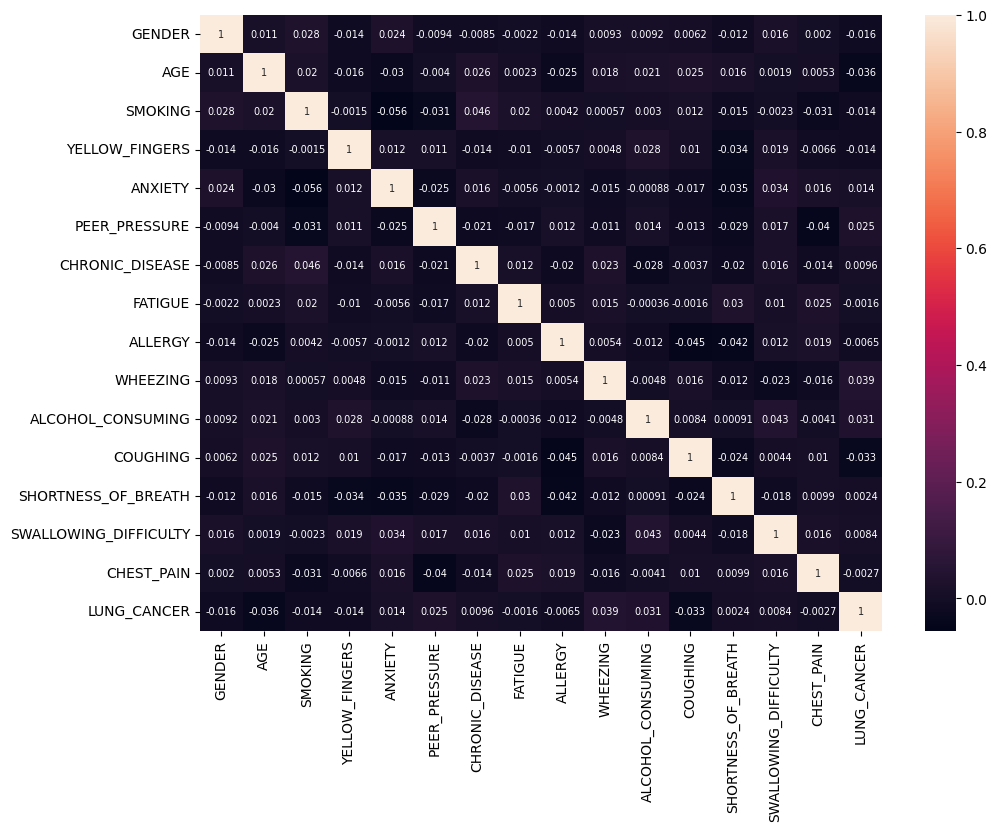

In [13]:
fig = plt.figure(figsize=(11,8))
corr = sns.heatmap(df.corr(), annot=True, annot_kws={'size':7})
plt.show()

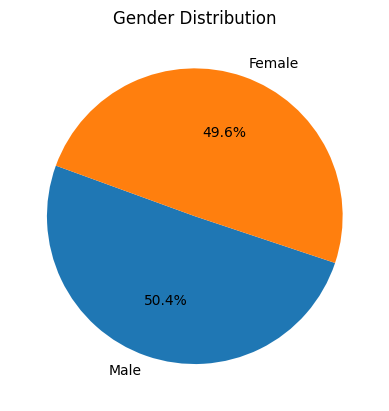

In [14]:
plt.pie(df['GENDER'].value_counts(), labels={'Male': 1, 'Female': 0}, autopct='%1.1f%%', startangle=160)
plt.title('Gender Distribution')
plt.show()

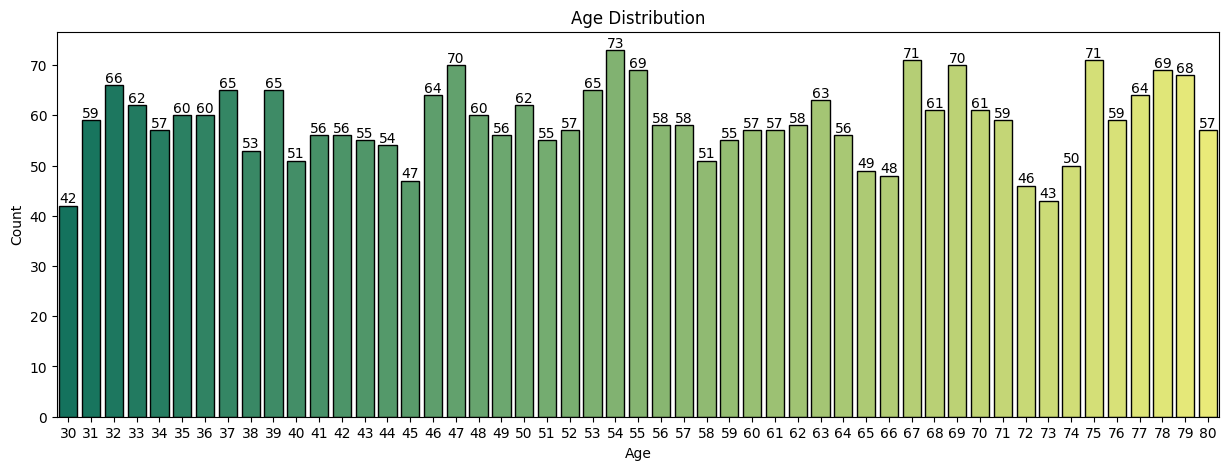

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count plot
plt.figure(figsize=(15,5))
sns.countplot(x=df['AGE'], edgecolor='black', palette='summer')

# Add title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Add count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), 
                   int(p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

In [16]:
X = df.iloc[0:,0:16]
y = df.iloc[0:,15:]

#### ***🔢 Step 3: Transforming for the Model – Encoding & Scaling***
Since machine learning models need numerical input:

* **I label encoded** categorical features like gender and smoking history.
* I then applied **feature scaling** using `StandardScaler` to normalize values — ensuring no feature dominated others just because of scale.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
y_binary=(y>np.median(y).astype(int))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-1.01054174,  0.7999711 ,  0.97924302, ...,  0.97179883,
         1.0280383 , -1.00573618],
       [-1.01054174, -0.904896  ,  0.97924302, ..., -1.02901956,
        -0.97272641,  0.99429653],
       [-1.01054174, -1.7232322 ,  0.97924302, ...,  0.97179883,
        -0.97272641,  0.99429653],
       ...,
       [ 0.98956823, -1.17767473, -1.02119696, ..., -1.02901956,
         1.0280383 ,  0.99429653],
       [-1.01054174, -1.45045346,  0.97924302, ..., -1.02901956,
         1.0280383 ,  0.99429653],
       [ 0.98956823,  1.41372325,  0.97924302, ...,  0.97179883,
         1.0280383 ,  0.99429653]])

#### ***🧠 Step 4: Prediction Models – Let the Algorithms Speak***
I tried several classification models to predict lung cancer:

* **Logistic Regression**

* **Random Forest**

* **K-Nearest Neighbors (KNN)**

* **Support Vector Machine (SVM)**

* **Decision Tree Classifier**

Each was trained and evaluated using **accuracy, precision, recall,** and **confusion matrix**.

🏆 **Best Performer: Logistic Regression**
With **~100% accuracy**, it struck the best balance between performance and interpretability.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [20]:
# Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Decision Tree
model_1=DecisionTreeClassifier()
model_1.fit(X_train,y_train)
y_pred_1=model_1.predict(X_test)

# K-Nearest Neighbour Classifier
model_2=KNeighborsClassifier()
model_2.fit(X_train,y_train)
y_pred_2=model_2.predict(X_test)

# Naive Bayes
model_3=MultinomialNB()
model_3.fit(X_train,y_train)
y_pred_3=model_3.predict(X_test)

# Support Vector Machine
model_4=SVC()
model_4.fit(X_train,y_train)
y_pred_4=model_4.predict(X_test)

In [21]:
# Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Decision Tree
model_1=DecisionTreeClassifier()
model_1.fit(X_train,y_train)
y_pred_1=model_1.predict(X_test)

# K-Nearest Neighbour Classifier
model_2=KNeighborsClassifier()
model_2.fit(X_train,y_train)
y_pred_2=model_2.predict(X_test)

# Naive Bayes
model_3=MultinomialNB()
model_3.fit(X_train,y_train)
y_pred_3=model_3.predict(X_test)

# Support Vector Machine
model_4=SVC()
model_4.fit(X_train,y_train)
y_pred_4=model_4.predict(X_test)

#### ***📈 Step 5: Results That Matter***
What excited me the most was not just the high accuracy — but how it aligned with real medical intuition. For example, features like **smoking, age,** and **chronic disease** had high importance scores in the Logistic Regression model.

In [22]:
accuracy=accuracy_score(y_test,y_pred)
print("Score For Logistic Regression:")
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Score For Logistic Regression:
Accuracy: 100.00%
Confusion Matrix:
 [[438   0]
 [  0 462]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       462

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



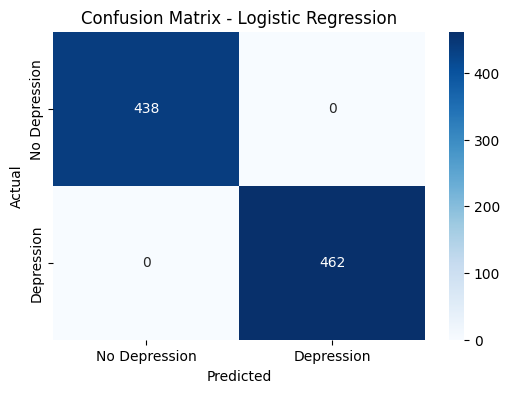

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Depression", "Depression"],
            yticklabels=["No Depression", "Depression"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [23]:
accuracy_1=accuracy_score(y_test,y_pred_1)
print("Score For Decision Tree Classifier:")
print("Accuracy: {:.2f}%".format(accuracy_1*100))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_1))
print("\nClassification Report:\n",classification_report(y_test,y_pred_1))

Score For Decision Tree Classifier:
Accuracy: 100.00%
Confusion Matrix:
 [[438   0]
 [  0 462]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       462

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



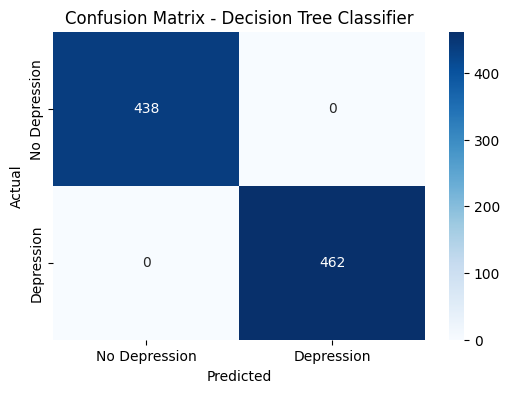

In [ ]:
cm = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Depression", "Depression"],
            yticklabels=["No Depression", "Depression"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [24]:
accuracy_2=accuracy_score(y_test,y_pred_2)
print("Score For K-Nearest Neighbour:")
print("Accuracy: {:.2f}%".format(accuracy_2*100))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_2))
print("\nClassification Report:\n",classification_report(y_test,y_pred_2))

Score For K-Nearest Neighbour:
Accuracy: 90.78%
Confusion Matrix:
 [[395  43]
 [ 40 422]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       438
           1       0.91      0.91      0.91       462

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



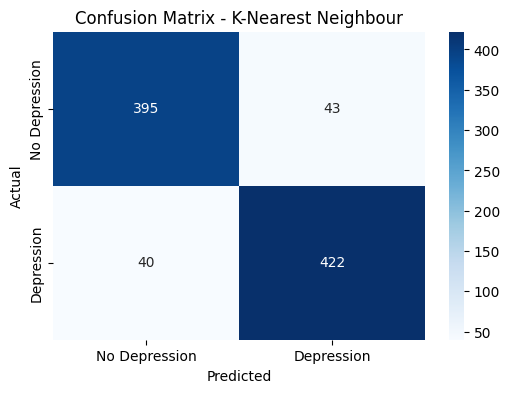

In [33]:
cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Depression", "Depression"],
            yticklabels=["No Depression", "Depression"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbour')
plt.show()

In [25]:
accuracy_3=accuracy_score(y_test,y_pred_3)
print("Score For Naive Bayes:")
print("Accuracy: {:.2f}%".format(accuracy_3*100))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_3))
print("\nClassification Report:\n",classification_report(y_test,y_pred_3))

Score For Naive Bayes:
Accuracy: 100.00%
Confusion Matrix:
 [[438   0]
 [  0 462]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       462

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



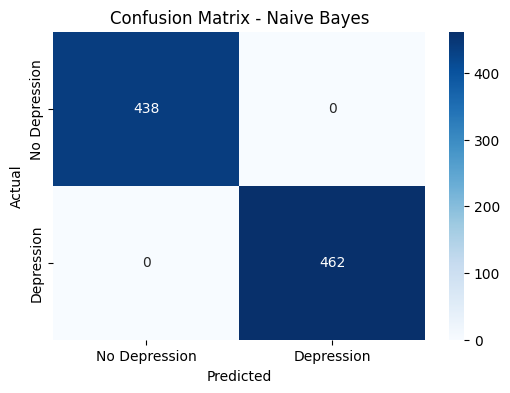

In [34]:
cm = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Depression", "Depression"],
            yticklabels=["No Depression", "Depression"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [26]:
accuracy_4=accuracy_score(y_test,y_pred_4)
print("Score For Support Vector Machine:")
print("Accuracy: {:.2f}%".format(accuracy_4*100))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_4))
print("\nClassification Report:\n",classification_report(y_test,y_pred_4))

Score For Support Vector Machine:
Accuracy: 67.44%


Confusion Matrix:
 [[295 143]
 [150 312]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.67       438
           1       0.69      0.68      0.68       462

    accuracy                           0.67       900
   macro avg       0.67      0.67      0.67       900
weighted avg       0.67      0.67      0.67       900



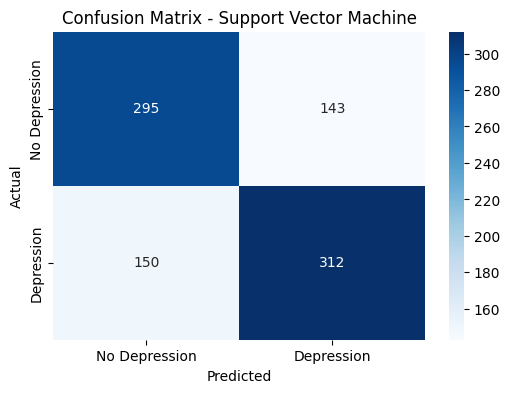

In [35]:
cm = confusion_matrix(y_test, y_pred_4)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Depression", "Depression"],
            yticklabels=["No Depression", "Depression"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

#### ***🧩 What's Next?***
This project helped me understand the **potential of AI in healthcare**. With real-time patient data, this model could assist doctors in early screening — potentially saving lives.

This wasn't just a project — it was a step toward **data-powered diagnosis**.